# Basic autoencoder

Ein Autoencoder ist ein spezieller Typ eines neuronalen Netzes, das darauf trainiert ist, seine Eingabe in seine Ausgabe zu kopieren. Bei einem Bild einer handgeschriebenen Ziffer beispielsweise kodiert ein Autoencoder das Bild zunächst in eine latente Darstellung mit niedrigeren Dimensionen und dekodiert dann die latente Darstellung zurück in ein Bild. Ein Autoencoder lernt, die Daten zu komprimieren und gleichzeitig den Rekonstruktionsfehler zu minimieren.

![Basic autoencoder results](../Bilder/intro_autoencoder_result.png)

## Package imports

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

## Dataset laden

In [14]:
(x_train, _), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


## Modell definieren

Ein Autoencoder ist ein spezieller Typ eines neuronalen Netzes, das darauf trainiert ist, seine Eingabe in seine Ausgabe zu kopieren. Bei einem Bild einer handgeschriebenen Ziffer beispielsweise kodiert ein Autoencoder das Bild zunächst in eine latente Darstellung mit niedrigeren Dimensionen und dekodiert dann die latente Darstellung zurück in ein Bild. Ein Autoencoder lernt, die Daten zu komprimieren und gleichzeitig den Rekonstruktionsfehler zu minimieren.

In [6]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    # dimension of hidden state in center of autoencoder
    self.latent_dim = latent_dim   
    
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
  
autoencoder = Autoencoder(latent_dim) 

In [7]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

Trainieren Sie das Modell mit "x_train" als Eingabe und Ziel. Der "Encoder" lernt, den Datensatz von 784 Dimensionen in den latenten Raum zu komprimieren, und der "Decoder" lernt, die Originalbilder zu rekonstruieren.

In [8]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 2s 961us/step - loss: 0.0237 - val_loss: 0.0131
Epoch 2/10
1875/1875 [==============================] - 2s 942us/step - loss: 0.0116 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 2s 954us/step - loss: 0.0100 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 2s 952us/step - loss: 0.0094 - val_loss: 0.0093
Epoch 5/10
1875/1875 [==============================] - 2s 924us/step - loss: 0.0092 - val_loss: 0.0091
Epoch 6/10
1875/1875 [==============================] - 2s 939us/step - loss: 0.0090 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 2s 944us/step - loss: 0.0089 - val_loss: 0.0089
Epoch 8/10
1875/1875 [==============================] - 2s 933us/step - loss: 0.0088 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 2s 919us/step - loss: 0.0088 - val_loss: 0.0088
Epoch 10/10
1875/1875 [==============================] - 2s 927u

Testen Sie nun das Modell durch encoden und decoden des Testsets.

In [9]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

In [10]:
def plot_examples(n, x_test, decoded_imgs, title1=None, title2=None):
    plt.figure(figsize=(2 * n, 4))
    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i])
        plt.title(title1)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i])
        plt.title(title2)
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

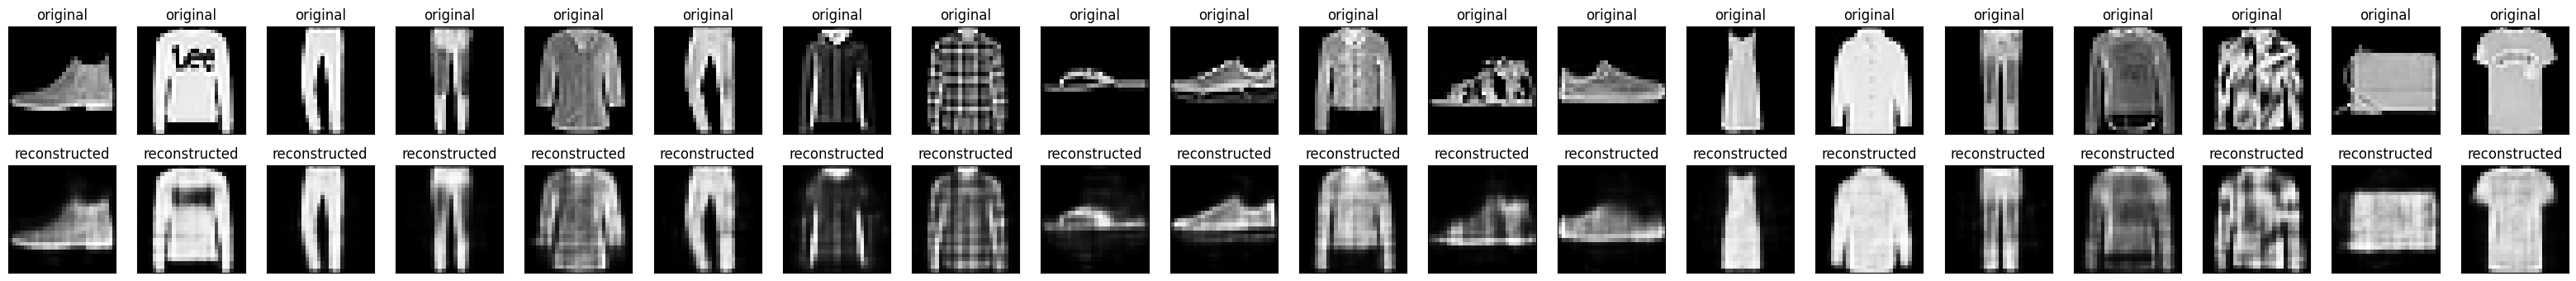

In [11]:
plot_examples(20, x_test, decoded_imgs, title1="original", title2="reconstructed")

Diese Vorgehensweise dient als Basis für verschiedene Anwendungsmöglichkeiten

### PCA + Visualisierung

In [12]:
encoded_imgs.shape

(10000, 64)

In [15]:
class_names = ['T-shirt/top', "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

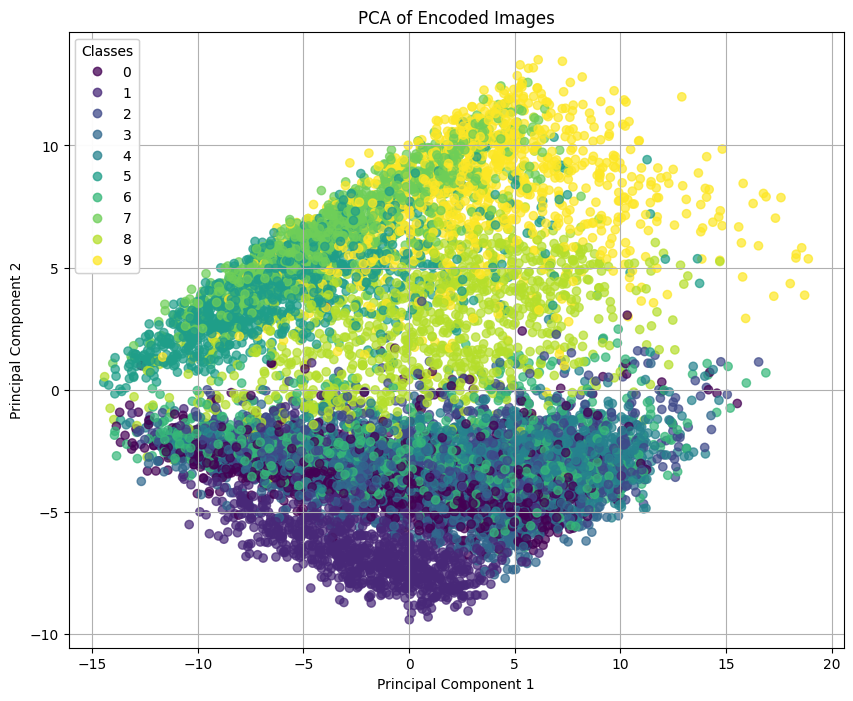

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming encoded_imgs is your array of shape (10000, 64)
# and y_test contains labels with values between 0 and 9

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
encoded_imgs_2d = pca.fit_transform(encoded_imgs)

# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    encoded_imgs_2d[:, 0],  # x-coordinates
    encoded_imgs_2d[:, 1],  # y-coordinates
    c=y_test,               # Colors based on labels
    cmap='viridis',         # Colormap for coloring by label
    alpha=0.7               # Transparency of points
)

# Create a legend with unique labels
legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
plt.gca().add_artist(legend1)

plt.title('PCA of Encoded Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

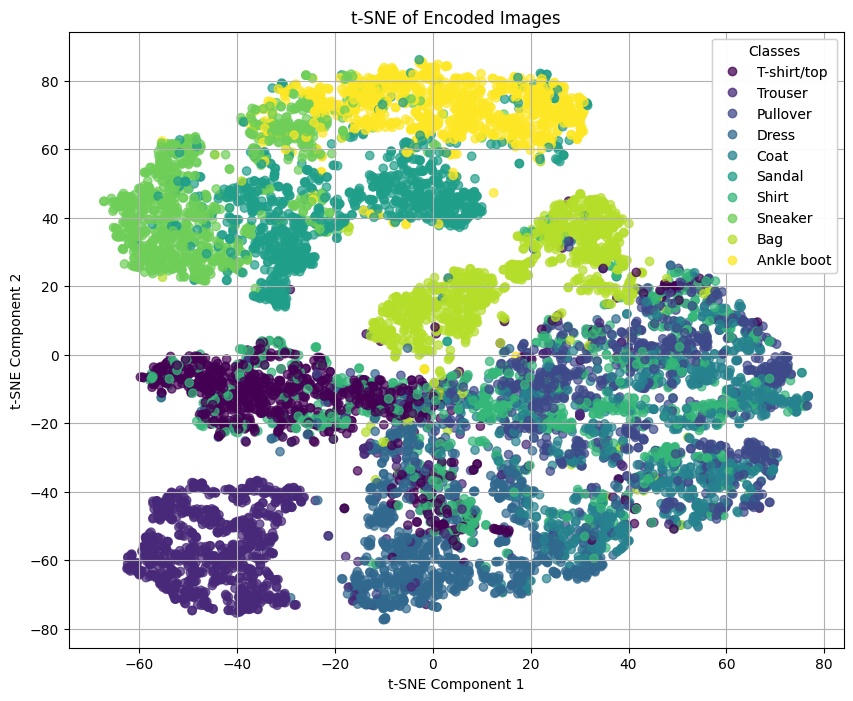

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Perform t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
encoded_imgs_2d_tsne = tsne.fit_transform(encoded_imgs)

# Plotting
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    encoded_imgs_2d_tsne[:, 0],  # x-coordinates
    encoded_imgs_2d_tsne[:, 1],  # y-coordinates
    c=y_test,                    # Colors based on labels
    cmap='viridis',              # Colormap for coloring by label
    alpha=0.7                    # Transparency of points
)

# Create a legend with class names
handles, labels = scatter.legend_elements()
# Use class names for labels based on indices
labeled_handles = [handles[i] for i in range(len(class_names))]
labeled_class_names = class_names
legend1 = plt.legend(labeled_handles, labeled_class_names, title="Classes")
plt.gca().add_artist(legend1)

plt.title('t-SNE of Encoded Images')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid(True)
plt.show()